In [1]:
import pandas as pd 
import numpy as np


In [2]:
df = pd.read_csv("Crime_Data_from_2020_to_Present.csv")

In [3]:
df.isna().sum()

DR_NO                   0
Date Rptd               0
DATE OCC                0
TIME OCC                0
AREA                    0
AREA NAME               0
Rpt Dist No             0
Part 1-2                0
Crm Cd                  0
Crm Cd Desc             0
Mocodes            151567
Vict Age                0
Vict Sex           144592
Vict Descent       144604
Premis Cd              16
Premis Desc           588
Weapon Used Cd     676308
Weapon Desc        676308
Status                  1
Status Desc             0
Crm Cd 1               11
Crm Cd 2           934330
Crm Cd 3          1001133
Crm Cd 4          1003384
LOCATION                0
Cross Street       849335
LAT                     0
LON                     0
dtype: int64

In [4]:
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'], errors='coerce')

df['Year'] = df['DATE OCC'].dt.year
df['Month'] = df['DATE OCC'].dt.month
df['Day'] = df['DATE OCC'].dt.day

C:\Users\OM yadav\AppData\Local\Temp\ipykernel_16456\4180793537.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DATE OCC'] = pd.to_datetime(df['DATE OCC'], errors='coerce')


In [5]:
df['AREA NAME'].value_counts()

AREA NAME
Central        69548
77th Street    61703
Pacific        59347
Southwest      57357
Hollywood      52350
N Hollywood    51019
Olympic        49997
Southeast      49894
Newton         49138
Wilshire       48148
Rampart        46772
West LA        45671
Northeast      42857
Van Nuys       42819
West Valley    42088
Devonshire     41689
Harbor         41311
Topanga        41302
Mission        40306
Hollenbeck     37034
Foothill       33098
Name: count, dtype: int64

In [6]:
df['AREA NAME'].unique()

array(['Wilshire', 'Central', 'Southwest', 'Van Nuys', 'Hollenbeck',
       'Rampart', 'Newton', 'Northeast', '77th Street', 'Hollywood',
       'Harbor', 'West Valley', 'West LA', 'N Hollywood', 'Pacific',
       'Devonshire', 'Mission', 'Southeast', 'Olympic', 'Foothill',
       'Topanga'], dtype=object)

In [7]:
# Define a mapping from detailed crime descriptions to broader crime categories
crime_type_map = {
    # Property Crimes
    'VEHICLE - STOLEN': 'Property Crime',
    'BURGLARY FROM VEHICLE': 'Property Crime',
    'BIKE - STOLEN': 'Property Crime',
    'SHOPLIFTING-GRAND THEFT ($950.01 & OVER)': 'Property Crime',
    'BURGLARY': 'Property Crime',
    'SHOPLIFTING - PETTY THEFT ($950 & UNDER)': 'Property Crime',
    'THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD': 'Property Crime',
    'THEFT PLAIN - PETTY ($950 & UNDER)': 'Property Crime',
    'THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)': 'Property Crime',
    'VEHICLE - ATTEMPT STOLEN': 'Property Crime',
    'BURGLARY FROM VEHICLE, ATTEMPTED': 'Property Crime',
    'THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)': 'Property Crime',
    'BUNCO, GRAND THEFT': 'Property Crime',
    'BUNCO, PETTY THEFT': 'Property Crime',
    'THEFT FROM MOTOR VEHICLE - ATTEMPT': 'Property Crime',
    'PICKPOCKET': 'Property Crime',
    'SHOPLIFTING - ATTEMPT': 'Property Crime',
    'BUNCO, ATTEMPT': 'Property Crime',
    'THEFT, PERSON': 'Property Crime',
    'THEFT, COIN MACHINE - PETTY ($950 & UNDER)': 'Property Crime',
    'THEFT, COIN MACHINE - GRAND ($950.01 & OVER)': 'Property Crime',
    'THEFT, COIN MACHINE - ATTEMPT': 'Property Crime',
    'GRAND THEFT / AUTO REPAIR': 'Property Crime',
    'PETTY THEFT - AUTO REPAIR': 'Property Crime',
    
    # Violent Crimes
    'ARSON': 'Violent Crime',
    'INTIMATE PARTNER - SIMPLE ASSAULT': 'Violent Crime',
    'ROBBERY': 'Violent Crime',
    'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT': 'Violent Crime',
    'BATTERY - SIMPLE ASSAULT': 'Violent Crime',
    'RAPE, FORCIBLE': 'Violent Crime',
    'CRIMINAL THREATS - NO WEAPON DISPLAYED': 'Violent Crime',
    'BRANDISH WEAPON': 'Violent Crime',
    'DISCHARGE FIREARMS/SHOTS FIRED': 'Violent Crime',
    'BATTERY POLICE (SIMPLE)': 'Violent Crime',
    'ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER': 'Violent Crime',
    'SEXUAL PENETRATION W/FOREIGN OBJECT': 'Violent Crime',
    'SHOTS FIRED AT INHABITED DWELLING': 'Violent Crime',
    'KIDNAPPING - GRAND ATTEMPT': 'Violent Crime',
    'SHOTS FIRED AT MOVING VEHICLE, TRAIN OR AIRCRAFT': 'Violent Crime',
    'CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT': 'Violent Crime',
    'CHILD ABUSE (PHYSICAL) - AGGRAVATED ASSAULT': 'Violent Crime',
    'CRIMINAL HOMICIDE': 'Violent Crime',
    'STALKING': 'Violent Crime',
    'LYNCHING - ATTEMPTED': 'Violent Crime',
    'MANSLAUGHTER, NEGLIGENT': 'Violent Crime',
    'BATTERY WITH SEXUAL CONTACT': 'Violent Crime',
    'KIDNAPPING': 'Violent Crime',
    
    # Sex / Child-related Crimes
    'PIMPING': 'Sex Crime',
    'PANDERING': 'Sex Crime',
    'ORAL COPULATION': 'Sex Crime',
    'INDECENT EXPOSURE': 'Sex Crime',
    'SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO ANUS OTH': 'Sex Crime',
    'CHILD PORNOGRAPHY': 'Sex Crime',
    'LEWD/LASCIVIOUS ACTS WITH CHILD': 'Sex Crime',
    'HUMAN TRAFFICKING - COMMERCIAL SEX ACTS': 'Sex Crime',
    'HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE': 'Sex Crime',
    'INCEST (SEXUAL ACTS BETWEEN BLOOD RELATIVES)': 'Sex Crime',
    'BEASTIALITY, CRIME AGAINST NATURE SEXUAL ASSLT WITH ANIM': 'Sex Crime',
    
    # Fraud/Financial Crimes
    'THEFT OF IDENTITY': 'Fraud/Financial Crime',
    'EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)': 'Fraud/Financial Crime',
    'DOCUMENT FORGERY / STOLEN FELONY': 'Fraud/Financial Crime',
    'EMBEZZLEMENT, PETTY THEFT ($950 & UNDER)': 'Fraud/Financial Crime',
    'DOCUMENT WORTHLESS ($200.01 & OVER)': 'Fraud/Financial Crime',
    'CREDIT CARDS, FRAUD USE ($950.01 & OVER)': 'Fraud/Financial Crime',
    'CREDIT CARDS, FRAUD USE ($950 & UNDER': 'Fraud/Financial Crime',
    'DISHONEST EMPLOYEE - GRAND THEFT': 'Fraud/Financial Crime',
    'DEFRAUDING INNKEEPER/THEFT OF SERVICES, $950 & UNDER': 'Fraud/Financial Crime',
    'DEFRAUDING INNKEEPER/THEFT OF SERVICES, OVER $950.01': 'Fraud/Financial Crime',
    'COUNTERFEIT': 'Fraud/Financial Crime',
    'GRAND THEFT / INSURANCE FRAUD': 'Fraud/Financial Crime',
    'DISHONEST EMPLOYEE - PETTY THEFT': 'Fraud/Financial Crime',
    
    # Legal / Administrative
    'VIOLATION OF COURT ORDER': 'Legal/Administrative',
    'VIOLATION OF RESTRAINING ORDER': 'Legal/Administrative',
    'CONTEMPT OF COURT': 'Legal/Administrative',
    'VIOLATION OF TEMPORARY RESTRAINING ORDER': 'Legal/Administrative',
    'FALSE POLICE REPORT': 'Legal/Administrative',
    'FIREARMS RESTRAINING ORDER (FIREARMS RO)': 'Legal/Administrative',
    'REPLICA FIREARMS(SALE,DISPLAY,MANUFACTURE OR DISTRIBUTE)': 'Legal/Administrative',
    'BIGAMY': 'Legal/Administrative',
    'BLOCKING DOOR INDUCTION CENTER': 'Legal/Administrative',
    'INCITING A RIOT': 'Legal/Administrative',
    
    # Cyber / Other
    'UNAUTHORIZED COMPUTER ACCESS': 'Cyber Crime',
    
    # Traffic Offenses
    'FAILURE TO YIELD': 'Traffic Offense',
    'RECKLESS DRIVING': 'Traffic Offense',
    
    # Child Crimes / Abuse
    'CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 YRS OLDER)': 'Child Crime',
    'CHILD STEALING': 'Child Crime',
    'CHILD NEGLECT (SEE 300 W.I.C.)': 'Child Crime',
    'CHILD ABANDONMENT': 'Child Crime',
    
    # Public Order & Other
    'OTHER MISCELLANEOUS CRIME': 'Other',
    'LETTERS, LEWD  -  TELEPHONE CALLS, LEWD': 'Other',
    'RESISTING ARREST': 'Other',
    'BOMB SCARE': 'Other',
    'FALSE IMPRISONMENT': 'Other',
    'THROWING OBJECT AT MOVING VEHICLE': 'Other',
    'DISTURBING THE PEACE': 'Other',
    'CONTRIBUTING': 'Other',
    'PROWLER': 'Other',
    'DRUNK ROLL': 'Other',
    'TRAIN WRECKING': 'Other',
    'DRUNK ROLL - ATTEMPT': 'Other',
    'FAILURE TO DISPERSE': 'Other',
    
    # Additional (Uncategorized / To be reviewed)
    'LETTERS, LEWD  -  TELEPHONE CALLS, LEWD': 'Other',
    'SEX OFFENDER REGISTRANT OUT OF COMPLIANCE': 'Other',
}

# For any crime not explicitly mapped, you might assign them as "Other"
df['Crime_Category'] = df['Crm Cd Desc'].map(crime_type_map).fillna('Other')


In [8]:
df['Crime_Category'].unique()

array(['Property Crime', 'Violent Crime', 'Sex Crime', 'Other',
       'Fraud/Financial Crime', 'Legal/Administrative', 'Cyber Crime',
       'Child Crime', 'Traffic Offense'], dtype=object)

In [9]:
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,Year,Month,Day,Crime_Category
0,190326475,03/01/2020 12:00:00 AM,2020-03-01,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506,2020,3,1,Property Crime
1,200106753,02/09/2020 12:00:00 AM,2020-02-08,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628,2020,2,8,Property Crime
2,200320258,11/11/2020 12:00:00 AM,2020-11-04,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002,2020,11,4,Property Crime
3,200907217,05/10/2023 12:00:00 AM,2020-03-10,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387,2020,3,10,Property Crime
4,200412582,09/09/2020 12:00:00 AM,2020-09-09,630,4,Hollenbeck,413,1,510,VEHICLE - STOLEN,...,NaN,NaN,200 E AVENUE 28,NaN,34.0820,-118.2130,2020,9,9,Property Crime


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

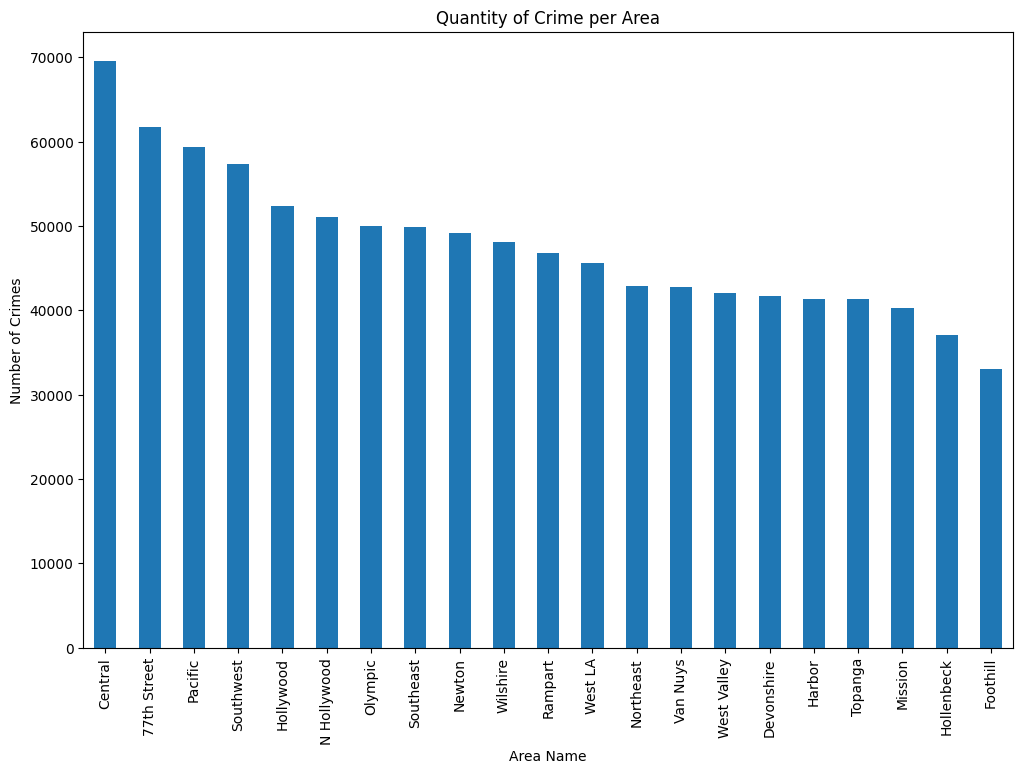

In [11]:
crime_per_area = df['AREA NAME'].value_counts()

plt.figure(figsize=(12, 8))
crime_per_area.plot(kind='bar')
plt.title('Quantity of Crime per Area')
plt.xlabel('Area Name')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=90)
plt.show()

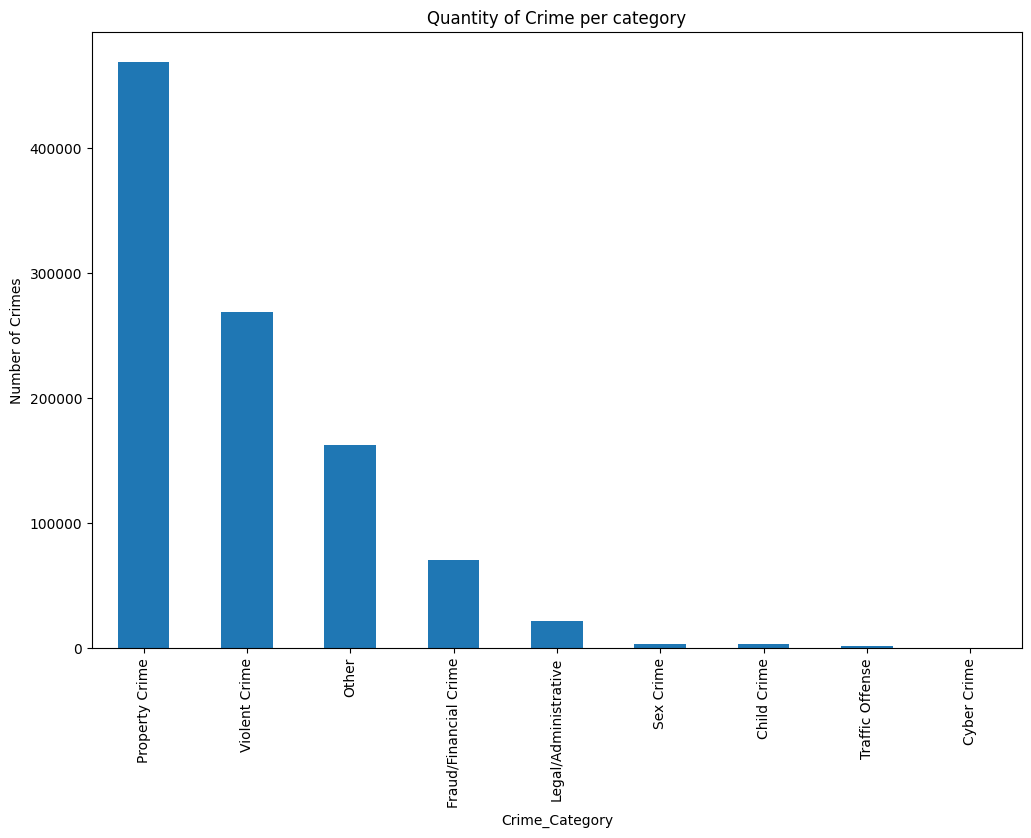

In [12]:
crime_per_category = df['Crime_Category'].value_counts()

plt.figure(figsize=(12, 8))
crime_per_category.plot(kind='bar')
plt.title('Quantity of Crime per category')
plt.xlabel('Crime_Category')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=90)
plt.show()

In [13]:
bins = [0, 18, 35, 60, np.inf]
labels = ['Child/Teen', 'Young Adult', 'Adult', 'Senior']
df['Vict_Age_Group'] = pd.cut(df['Vict Age'], bins=bins, labels=labels, right=False)

In [14]:
column = [  'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'Vict Descent',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'Cross Street', 'Vict Age']

df.drop(columns=column, inplace=True)

df.columns

Index(['DR_NO', 'AREA NAME', 'Vict Sex', 'LOCATION', 'LAT', 'LON', 'Year',
       'Month', 'Day', 'Crime_Category', 'Vict_Age_Group'],
      dtype='object')

In [15]:
df.isna().sum()

DR_NO                  0
AREA NAME              0
Vict Sex          144592
LOCATION               0
LAT                    0
LON                    0
Year                   0
Month                  0
Day                    0
Crime_Category         0
Vict_Age_Group       135
dtype: int64

In [16]:
mapping = {
    'M': 'M',
    'F': 'F',
    'X': 'Other',
    'H': 'Other',
    '-': 'Other'
}

df['Vict Sex'] = df['Vict Sex'].map(mapping)

In [17]:
df['Vict Sex'].fillna("Other", inplace=True)

C:\Users\OM yadav\AppData\Local\Temp\ipykernel_16456\4013225973.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Vict Sex'].fillna("Other", inplace=True)


In [18]:
df['Vict_Age_Group'].fillna("Adult", inplace=True)

C:\Users\OM yadav\AppData\Local\Temp\ipykernel_16456\2745445893.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Vict_Age_Group'].fillna("Adult", inplace=True)


In [19]:
df['Vict_Age_Group'].value_counts()

Vict_Age_Group
Adult          318543
Young Adult    299664
Child/Teen     294485
Senior          90756
Name: count, dtype: int64

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb

In [21]:
agg_df = df.groupby(['Month','Year', 'AREA NAME',  'Vict Sex', 'Crime_Category']) \
           .size().reset_index(name='Crime_Count')


print("Aggregated Data Sample:")
print(agg_df.head(10))

Aggregated Data Sample:
   Month  Year    AREA NAME Vict Sex         Crime_Category  Crime_Count
0      1  2020  77th Street        F            Child Crime           11
1      1  2020  77th Street        F  Fraud/Financial Crime           40
2      1  2020  77th Street        F   Legal/Administrative           31
3      1  2020  77th Street        F                  Other           94
4      1  2020  77th Street        F         Property Crime          114
5      1  2020  77th Street        F              Sex Crime           11
6      1  2020  77th Street        F          Violent Crime          273
7      1  2020  77th Street        M            Child Crime            1
8      1  2020  77th Street        M  Fraud/Financial Crime           40
9      1  2020  77th Street        M   Legal/Administrative           12


In [22]:
print(agg_df.columns)

Index(['Month', 'Year', 'AREA NAME', 'Vict Sex', 'Crime_Category',
       'Crime_Count'],
      dtype='object')


In [23]:
median_count = agg_df['Crime_Count'].median()
print(median_count)

def categorize_crime(count):
    if count <= 20:
        return 'Low'
    elif count <= 40:
        return 'Medium'
    else:
        return 'High'




20.0


In [24]:

agg_df['Crime_Level'] = agg_df['Crime_Count'].apply(categorize_crime)
print(agg_df[['Crime_Count', 'Crime_Level']].head())

   Crime_Count Crime_Level
0           11         Low
1           40      Medium
2           31      Medium
3           94        High
4          114        High


In [25]:
agg_df.drop(columns='Crime_Count', inplace=True)

In [26]:
le = LabelEncoder()
agg_df['Crime_Level'] = le.fit_transform(agg_df['Crime_Level'])
agg_df['AREA NAME'] = le.fit_transform(agg_df['AREA NAME'])

agg_df['Vict Sex'] = le.fit_transform(agg_df['Vict Sex'])
agg_df['Crime_Category'] = le.fit_transform(agg_df['Crime_Category'])



In [27]:
agg_df.columns

Index(['Month', 'Year', 'AREA NAME', 'Vict Sex', 'Crime_Category',
       'Crime_Level'],
      dtype='object')

In [28]:
agg_df.head(20)

,Month,Year,AREA NAME,Vict Sex,Crime_Category,Crime_Level
0,1,2020,0,0,0,1
1,1,2020,0,0,2,2
2,1,2020,0,0,3,2
3,1,2020,0,0,4,0
4,1,2020,0,0,5,0
5,1,2020,0,0,6,1
6,1,2020,0,0,8,0
7,1,2020,0,1,0,1
8,1,2020,0,1,2,2
9,1,2020,0,1,3,1


In [29]:
x = agg_df[['AREA NAME','Month', 'Year', 'AREA NAME',  'Vict Sex' ,'Crime_Category']]

y = agg_df['Crime_Level']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [31]:
def regression_accuracy(y_true, y_pred, tolerance=0.01):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    relative_error = np.where(y_true != 0, np.abs(y_true - y_pred) / np.abs(y_true), np.abs(y_pred))
    accuracy = np.mean(relative_error <= tolerance)
    return accuracy

In [32]:
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train, y_train)
y_pred_dt = dt_reg.predict(X_test)
acc_dt = regression_accuracy(y_test, y_pred_dt, tolerance=0.01)
mse = mean_squared_error(y_test, y_pred_dt)
mae = mean_absolute_error(y_test, y_pred_dt)
r2 = r2_score(y_test, y_pred_dt)

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"R2 Score: {r2:.4f}")
print("Decision Tree Regressor Accuracy (within 5% tolerance):", acc_dt)

MAE: 0.1388
MSE: 0.2207
R2 Score: 0.4859
Decision Tree Regressor Accuracy (within 5% tolerance): 0.9021512838306731


C:\Users\OM yadav\AppData\Local\Temp\ipykernel_16456\1971489696.py:4: RuntimeWarning: divide by zero encountered in divide
  relative_error = np.where(y_true != 0, np.abs(y_true - y_pred) / np.abs(y_true), np.abs(y_pred))
C:\Users\OM yadav\AppData\Local\Temp\ipykernel_16456\1971489696.py:4: RuntimeWarning: invalid value encountered in divide
  relative_error = np.where(y_true != 0, np.abs(y_true - y_pred) / np.abs(y_true), np.abs(y_pred))


In [33]:
rf_model = RandomForestRegressor(
    n_estimators=100,
      random_state=42
)

rf_model.fit(X_train, y_train)
y_pred_rfr = rf_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred_rfr)
mae = mean_absolute_error(y_test, y_pred_rfr)
r2 = r2_score(y_test, y_pred_rfr)

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"R2 Score: {r2:.4f}")
acc_rf = regression_accuracy(y_test, y_pred_rfr, tolerance=0.05)
print("RandomForest Regressor Accuracy (within 5% tolerance) on test set:", acc_rf)

MAE: 0.1409
MSE: 0.1302
R2 Score: 0.6966
RandomForest Regressor Accuracy (within 5% tolerance) on test set: 0.7473976405274115


C:\Users\OM yadav\AppData\Local\Temp\ipykernel_16456\1971489696.py:4: RuntimeWarning: divide by zero encountered in divide
  relative_error = np.where(y_true != 0, np.abs(y_true - y_pred) / np.abs(y_true), np.abs(y_pred))
C:\Users\OM yadav\AppData\Local\Temp\ipykernel_16456\1971489696.py:4: RuntimeWarning: invalid value encountered in divide
  relative_error = np.where(y_true != 0, np.abs(y_true - y_pred) / np.abs(y_true), np.abs(y_pred))


In [34]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf_clf = rf_clf.predict(X_test)
acc_rf_clf = np.mean(y_pred_rf_clf == y_test)
print("RandomForest Classifier Accuracy:", acc_rf_clf)

RandomForest Classifier Accuracy: 0.9266712930835068


In [35]:
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)
acc_log = np.mean(y_pred_log == y_test)
print("Logistic Regression Accuracy:", acc_log)

Logistic Regression Accuracy: 0.508674531575295


In [36]:
import pickle 

with open("rf_clf_pred.pkl","wb") as f:
    pickle.dump(rf_clf,f)

In [37]:
import pandas as pd
import itertools
from sklearn.preprocessing import LabelEncoder

# Define the unique values from your dataset (ensure these match your training data)
months = list(range(1, 13))
area_names = ['Wilshire', 'Central', 'Southwest', 'Van Nuys', 'Hollenbeck',
              'Rampart', 'Newton', 'Northeast', '77th Street', 'Hollywood',
              'Harbor', 'West Valley', 'West LA', 'N Hollywood', 'Pacific',
              'Devonshire', 'Mission', 'Southeast', 'Olympic', 'Foothill',
              'Topanga']
vict_sexes = ['M', 'F', 'Other']
crime_categories = ['Property Crime', 'Violent Crime', 'Sex Crime', 'Other',
                    'Fraud/Financial Crime', 'Legal/Administrative', 'Cyber Crime',
                    'Child Crime', 'Traffic Offense']

# Create all possible combinations of the features
combinations = list(itertools.product(months, area_names, vict_sexes, crime_categories))

# Create a DataFrame from the combinations with original (unencoded) values
new_data = pd.DataFrame(combinations, columns=['month', 'area name', 'vict sex', 'crime category'])
new_data['year'] = 2025

# Save a copy of the original new_data for output (unencoded values)
new_data_original = new_data.copy()

# Create a copy for encoding and predictions
encoded_data = new_data.copy()

# Initialize label encoders
le_area = LabelEncoder()
le_crime = LabelEncoder()
le_sex = LabelEncoder()

# Fit the encoders using the training unique values
le_area.fit(area_names)
le_crime.fit(crime_categories)
le_sex.fit(vict_sexes)

# Transform the categorical columns in the encoded_data
encoded_data['area name'] = le_area.transform(encoded_data['area name'])
encoded_data['crime category'] = le_crime.transform(encoded_data['crime category'])
encoded_data['vict sex'] = le_sex.transform(encoded_data['vict sex'])

# Rename the columns to match those used during model training
encoded_data.rename(columns={
    'month': 'Month',
    'area name': 'AREA NAME',
    'vict sex': 'Vict Sex',
    'crime category': 'Crime_Category',
    'year': 'Year'
}, inplace=True)

# Reorder columns to match training (using model's stored feature names if available)
try:
    encoded_data = encoded_data[rf_clf.feature_names_in_]
except AttributeError:
    # Replace the list below with the order used during your training if different
    encoded_data = encoded_data[['AREA NAME', 'Crime_Category', 'Month', 'Vict Sex', 'Year']]

# Generate predictions using the random forest classifier (stored as rf_clf)
predictions = rf_clf.predict(encoded_data)

# Attach predictions to the original new_data (with unencoded values)
new_data_original['prediction'] = predictions

# Display the first few rows of the output DataFrame
print(new_data_original.head())


   month area name vict sex         crime category  year  prediction
0      1  Wilshire        M         Property Crime  2025           0
1      1  Wilshire        M          Violent Crime  2025           0
2      1  Wilshire        M              Sex Crime  2025           1
3      1  Wilshire        M                  Other  2025           0
4      1  Wilshire        M  Fraud/Financial Crime  2025           2


In [38]:
with open("predictions.pkl","wb") as f:
    pickle.dump(new_data_original,f)